# Data Mining Prediksi Penjualan Perbulan EROPA
Tujuan: 
* Dapat melihat sebuah ramalan pendapatan 9 bulan berikutnya berdasarkan data yang ada. hasil prediksi akan digunakan untuk membantu pemilik kepentingan dalam membuat keputusan bisnis terkait

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('Dim_Time.csv')
df2 = pd.read_csv('Fact_Sales.csv')

In [13]:
df1.head()

,Full_Date,Date_Key,Year,Quarter,Month,Month_Name,Day_Name
0,2010-01-01,20100101,2010,1,1,January,Friday
1,2010-01-03,20100103,2010,1,1,January,Sunday
2,2010-01-06,20100106,2010,1,1,January,Wednesday
3,2010-01-10,20100110,2010,1,1,January,Sunday
4,2010-01-11,20100111,2010,1,1,January,Monday


In [14]:
df2.head()

,Order ID,Date_Key,Country_Key,Product_Key,Channel_Key,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,478051030,20110912,11,2,1,4778,47.45,31.79,226716.10,151892.62,74823.48
1,919133651,20131014,7,4,2,927,109.28,35.84,101302.56,33223.68,68078.88
2,987410676,20140813,4,3,1,5616,205.70,117.11,1155211.20,657689.76,497521.44
3,672330081,20101031,8,9,2,6266,651.21,524.96,4080481.86,3289399.36,791082.50
4,579463422,20160928,13,6,2,4958,9.33,6.92,46258.14,34309.36,11948.78


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Full_Date   1049 non-null   object
 1   Date_Key    1049 non-null   int64 
 2   Year        1049 non-null   int64 
 3   Quarter     1049 non-null   int64 
 4   Month       1049 non-null   int64 
 5   Month_Name  1049 non-null   object
 6   Day_Name    1049 non-null   object
dtypes: int64(4), object(3)
memory usage: 57.5+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       1330 non-null   int64  
 1   Date_Key       1330 non-null   int64  
 2   Country_Key    1330 non-null   int64  
 3   Product_Key    1330 non-null   int64  
 4   Channel_Key    1330 non-null   int64  
 5   Units Sold     1330 non-null   int64  
 6   Unit Price     1330 non-null   float64
 7   Unit Cost      1330 non-null   float64
 8   Total Revenue  1330 non-null   float64
 9   Total Cost     1330 non-null   float64
 10  Total Profit   1330 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 114.4 KB


In [51]:
df1.describe()

,Date_Key,Year,Quarter,Month
count,1.049000e+03,1049.000000,1049.000000,1049.000000
mean,2.013379e+07,2013.314585,2.428027,6.278360
std,2.175463e+04,2.178615,1.116674,3.434601
min,2.010010e+07,2010.000000,1.000000,1.000000
25%,2.011122e+07,2011.000000,1.000000,3.000000
50%,2.013102e+07,2013.000000,2.000000,6.000000
75%,2.015083e+07,2015.000000,3.000000,9.000000
max,2.017072e+07,2017.000000,4.000000,12.000000


In [50]:
df2.describe()

,Order ID,Date_Key,Country_Key,Product_Key,Channel_Key,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.330000e+03,1.330000e+03,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1.330000e+03,1.330000e+03,1.330000e+03
mean,5.412048e+08,2.013370e+07,24.596241,6.503759,1.498496,4949.114286,264.893541,187.246812,1.280919e+06,9.037191e+05,3.772000e+05
std,2.573882e+08,2.186216e+04,13.950525,3.472615,0.500186,2904.105430,217.323460,176.158873,1.443065e+06,1.134845e+06,3.689833e+05
min,1.006406e+08,2.010010e+07,1.000000,1.000000,1.000000,2.000000,9.330000,6.920000,5.038200e+02,3.736800e+02,1.301400e+02
25%,3.190004e+08,2.011122e+07,12.000000,3.000000,1.000000,2360.750000,81.730000,35.840000,2.661169e+05,1.577943e+05,8.482294e+04
50%,5.387164e+08,2.013102e+07,25.000000,6.000000,1.000000,4958.000000,154.060000,97.440000,7.613049e+05,4.332233e+05,2.735946e+05
75%,7.544628e+08,2.015083e+07,37.000000,9.000000,2.000000,7458.750000,437.200000,263.330000,1.742756e+06,1.108362e+06,5.476582e+05
max,9.998797e+08,2.017072e+07,48.000000,12.000000,2.000000,9999.000000,668.270000,524.960000,6.672676e+06,5.248025e+06,1.700449e+06


In [6]:
df_final = df2.merge(df1, on='Date_Key', how='left')


In [7]:
df_final['Full_Date'] = pd.to_datetime(df_final['Full_Date'])
df_final = df_final.sort_values('Full_Date')

In [8]:
monthly = (
    df_final
    .set_index('Full_Date')
    .resample('M')['Total Revenue']
    .sum()
)

monthly.head()


Full_Date
2010-01-31    21115354.48
2010-02-28    19853023.20
2010-03-31     8474747.19
2010-04-30    10058016.05
2010-05-31    20304725.59
Freq: ME, Name: Total Revenue, dtype: float64

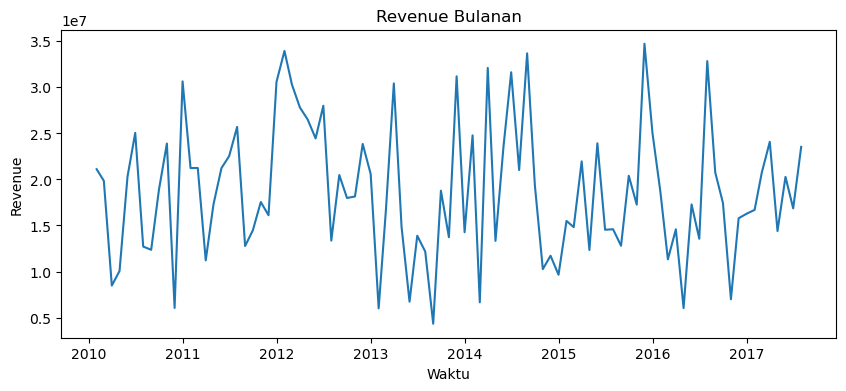

In [9]:
plt.figure(figsize=(10,4))
plt.plot(monthly)
plt.title('Revenue Bulanan')
plt.xlabel('Waktu')
plt.ylabel('Revenue')
plt.show()


In [65]:
n_test = 9
train = monthly.iloc[:-n_test]
test  = monthly.iloc[-n_test:]


In [66]:
hw_model = ExponentialSmoothing(train, trend='add', seasonal = 'add', seasonal_periods=8, initialization_method='estimated')
hw_fit = hw_model.fit()
forecast_hw = hw_fit.forecast(len(test))

In [67]:
mae_hw = mean_absolute_error(test, forecast_hw)
mae_hw

3544289.1355884573

In [68]:
mape_hw = np.mean(
    np.abs((test - forecast_hw) / test.replace(0, np.nan))
) * 100
mape_hw

np.float64(19.316566304099272)

In [69]:
print(f"MAE  : {mae_hw:,.0f}")
print(f"MAPE : {mape_hw:.2f}%")

MAE  : 3,544,289
MAPE : 19.32%


MAE → seberapa besar salah prediksi dalam nilai uang

MAPE → seberapa besar kesalahan relatif (%)

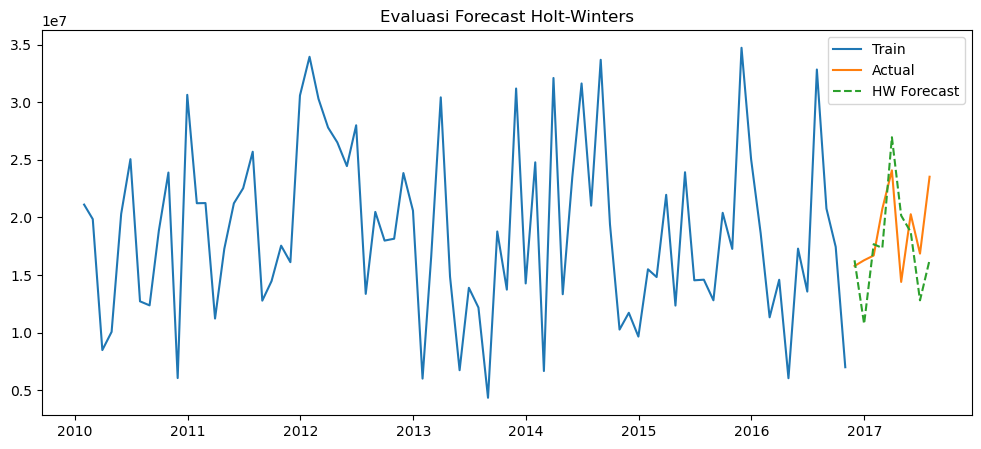

In [70]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_hw, '--', label='HW Forecast')
plt.legend()
plt.title('Evaluasi Forecast Holt-Winters')
plt.show()


In [29]:
evaluation_df = pd.DataFrame({
    'Order Date': test.index,
    'Actual Revenue': test.values,
    'Predicted Revenue': forecast_hw
})
evaluation_df


,Order Date,Actual Revenue,Predicted Revenue
2016-11-30,2016-11-30,15783807.18,1.627571e+07
2016-12-31,2016-12-31,16279887.25,1.074883e+07
2017-01-31,2017-01-31,16692258.39,1.767669e+07
2017-02-28,2017-02-28,20751212.32,1.734499e+07
2017-03-31,2017-03-31,24088987.50,2.696850e+07
2017-04-30,2017-04-30,14397482.38,2.016308e+07
2017-05-31,2017-05-31,20279233.36,1.872905e+07
2017-06-30,2017-06-30,16855010.05,1.279681e+07
2017-07-31,2017-07-31,23536290.16,1.630480e+07


In [52]:
evaluation_df.to_csv('Prediksi_9_bulan_ke_depan.csv', index=False)